# Pre-processing Overlay data for WaDE upload.
- Purpose: To preprocess state overlay data into one main file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/WaDE Data Folder/Montana/Overlays" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/WaDE Data Folder/Montana/Overlays


## Overlay Area Data #1

In [3]:
# Input File
inputFile = "RawInputData/shapefiles/ConservationDistricts.zip"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")
dfin1['geometry'] = dfin1['geometry'].to_crs(epsg=4326) # Realign Geometry Projection

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "ov" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/ConservationDistricts.zip', compression=dict(method='zip', archive_name='ConservationDistricts.csv'), index=False)

print(len(dfin1))
dfin1.head()

59


,OBJECTID,DISTRICT_N,MACD_AREA,MACD_NAME,ORG_DATE,URL,SQMILES,ACRES,SHAPE_Leng,SHAPE_Area,geometry,WaDEUUID
0,1,Valley County Conservation District,1,Northeast,1945-06-21,http://dnrc.mt.gov/divisions/cardd/conservatio...,5056.39222,130960481.26100,6.72585,1.59046,"POLYGON ((-106.15193 48.85645, -106.15193 48.8...",ov0
1,2,Toole County Conservation District,3,North Central,1947-12-27,http://dnrc.mt.gov/divisions/cardd/conservatio...,1943.84867,50345650.92060,3.52242,0.61474,"POLYGON ((-111.26988 48.99724, -111.26988 48.9...",ov1
2,3,Blaine County Conservation District,3,North Central,1947-12-27,http://dnrc.mt.gov/divisions/cardd/conservatio...,4236.22555,109718177.00300,5.53664,1.33405,"POLYGON ((-108.2364 48.99673, -108.2364 48.993...",ov2
3,4,McCone Conservation District,1,Northeast,1945-06-21,http://dnrc.mt.gov/divisions/cardd/conservatio...,2679.08836,69388347.53940,4.88254,0.83153,"POLYGON ((-105.32448 48.08853, -105.32409 48.0...",ov3
4,5,Dawson County Conservation District,2,Southeast,1945-08-07,http://dnrc.mt.gov/divisions/cardd/conservatio...,2380.63448,61658396.61250,4.10532,0.73377,"POLYGON ((-105.23499 47.7073, -105.23501 47.70...",ov4


In [4]:
# create output for Overlay Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "8/3/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "MTov_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin1["MACD_NAME"]
df['in_ReportingUnitNativeID'] = "MTov" + dfin1["OBJECTID"].replace("", 0).fillna(0).astype(int).astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Conservation Districts"
df['in_ReportingUnitUpdateDate'] = "9/21/2021"
df['in_StateCV'] = "MT"
df['in_Geometry'] = dfin1['geometry']

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Montana Department of Natural Resources"
df['in_RegulatoryDescription'] = "Help citizens conserve their soil, water, and other renewable natural resources."
df['in_RegulatoryName'] = dfin1["MACD_NAME"]
df['in_RegulatoryOverlayNativeID'] = dfin1["OBJECTID"]
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] ="https://dnrc.mt.gov/Conservation/Conservation-Programs/Conservation-Districts/"
df['in_StatutoryEffectiveDate'] = dfin1["ORG_DATE"]
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Conservation District"
df['in_WaterSourceTypeCV'] = "Surface Water"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

59


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,ov0,8/3/2023,2023,MTov_O1,4326,Northeast,MTov1,,Conservation Districts,9/21/2021,MT,"POLYGON ((-106.15193 48.85645, -106.15193 48.8...",Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",Northeast,1,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1945-06-21,,Conservation District,Surface Water
1,ov1,8/3/2023,2023,MTov_O1,4326,North Central,MTov2,,Conservation Districts,9/21/2021,MT,"POLYGON ((-111.26988 48.99724, -111.26988 48.9...",Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",North Central,2,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1947-12-27,,Conservation District,Surface Water
2,ov2,8/3/2023,2023,MTov_O1,4326,North Central,MTov3,,Conservation Districts,9/21/2021,MT,"POLYGON ((-108.2364 48.99673, -108.2364 48.993...",Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",North Central,3,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1947-12-27,,Conservation District,Surface Water
3,ov3,8/3/2023,2023,MTov_O1,4326,Northeast,MTov4,,Conservation Districts,9/21/2021,MT,"POLYGON ((-105.32448 48.08853, -105.32409 48.0...",Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",Northeast,4,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1945-06-21,,Conservation District,Surface Water
4,ov4,8/3/2023,2023,MTov_O1,4326,Southeast,MTov5,,Conservation Districts,9/21/2021,MT,"POLYGON ((-105.23499 47.7073, -105.23501 47.70...",Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",Southeast,5,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1945-08-07,,Conservation District,Surface Water


## Concatenate DataFrames together

In [5]:
# Concatenate dataframes
frames = [outdf1] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

59


## Clean Data / data types

In [6]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [7]:
outdf['in_ReportingUnitName'] = outdf.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['Northeast', 'North Central', 'Southeast', 'Northwest',
       'South Central', 'Southwest', ''], dtype=object)

In [8]:
outdf['in_RegulatoryDescription'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['Help citizens conserve their soil, water, and other renewable natural resources.'],
      dtype=object)

In [9]:
outdf['in_RegulatoryName'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['Northeast', 'North Central', 'Southeast', 'Northwest',
       'South Central', 'Southwest', ''], dtype=object)

In [10]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

<DatetimeArray>
['1945-06-21 00:00:00', '1947-12-27 00:00:00', '1945-08-07 00:00:00',
 '1943-11-03 00:00:00', '1946-07-19 00:00:00', '1957-07-25 00:00:00',
                 'NaT', '1946-05-08 00:00:00']
Length: 8, dtype: datetime64[ns]

# Geometry Data
- For attaching geometry to overlay reporting unit area info.

#### Overlay Area #1 shapefile info

In [11]:
# # Input File / or use same input as above

gdfin1 = outdf.copy()
gdfin1 = gpd.GeoDataFrame(gdfin1, geometry=gdfin1['in_Geometry'], crs="EPSG:4326") # covert to geodataframe
print(len(gdfin1))
gdfin1.head()

59


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV,geometry
0,ov0,8/3/2023,2023,MTov_O1,4326,Northeast,MTov1,,Conservation Districts,9/21/2021,MT,"POLYGON ((-106.15193 48.85645, -106.15193 48.8...",Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",Northeast,1,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1945-06-21,,Conservation District,Surface Water,"POLYGON ((-106.15193 48.85645, -106.15193 48.8..."
1,ov1,8/3/2023,2023,MTov_O1,4326,North Central,MTov2,,Conservation Districts,9/21/2021,MT,"POLYGON ((-111.26988 48.99724, -111.26988 48.9...",Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",North Central,2,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1947-12-27,,Conservation District,Surface Water,"POLYGON ((-111.26988 48.99724, -111.26988 48.9..."
2,ov2,8/3/2023,2023,MTov_O1,4326,North Central,MTov3,,Conservation Districts,9/21/2021,MT,"POLYGON ((-108.2364 48.99673, -108.2364 48.993...",Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",North Central,3,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1947-12-27,,Conservation District,Surface Water,"POLYGON ((-108.2364 48.99673, -108.2364 48.993..."
3,ov3,8/3/2023,2023,MTov_O1,4326,Northeast,MTov4,,Conservation Districts,9/21/2021,MT,"POLYGON ((-105.32448 48.08853, -105.32409 48.0...",Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",Northeast,4,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1945-06-21,,Conservation District,Surface Water,"POLYGON ((-105.32448 48.08853, -105.32409 48.0..."
4,ov4,8/3/2023,2023,MTov_O1,4326,Southeast,MTov5,,Conservation Districts,9/21/2021,MT,"POLYGON ((-105.23499 47.7073, -105.23501 47.70...",Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",Southeast,5,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1945-08-07,,Conservation District,Surface Water,"POLYGON ((-105.23499 47.7073, -105.23501 47.70..."


<Axes: >

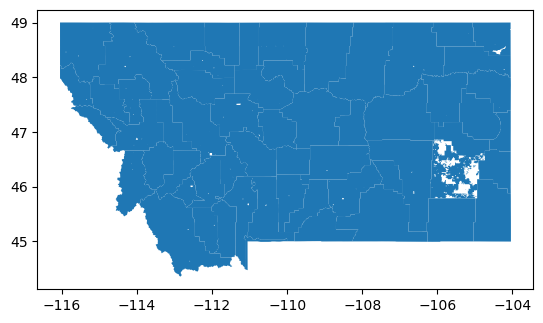

In [12]:
# plot shape info to map
gdfin1.plot()

In [13]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] =  gdfin1["in_ReportingUnitNativeID"].astype(str)  #in_ReportingUnitNativeID needs to match source from above equivalent dataframe
goutdf1['geometry'] = gdfin1['in_Geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)

# drop geometery from outdf
outdf = outdf.drop(['in_Geometry'], axis=1)


print(len(goutdf1))
goutdf1.head()

59


,in_ReportingUnitNativeID,geometry
0,MTov1,"POLYGON ((-106.15193 48.85645, -106.15193 48.8..."
1,MTov2,"POLYGON ((-111.26988 48.99724, -111.26988 48.9..."
2,MTov3,"POLYGON ((-108.2364 48.99673, -108.2364 48.993..."
3,MTov4,"POLYGON ((-105.32448 48.08853, -105.32409 48.0..."
4,MTov5,"POLYGON ((-105.23499 47.7073, -105.23501 47.70..."


#### Overlay Area #2 shapefile info

In [14]:
# etc etc...

#### Concatenate goutdf shapefile info into single output

In [15]:
# Concatenate Geometry DataFrames
frames = [goutdf1] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

59


,in_ReportingUnitNativeID,geometry
0,MTov1,"POLYGON ((-106.15193 48.85645, -106.15193 48.8..."
1,MTov2,"POLYGON ((-111.26988 48.99724, -111.26988 48.9..."
2,MTov3,"POLYGON ((-108.2364 48.99673, -108.2364 48.993..."
3,MTov4,"POLYGON ((-105.32448 48.08853, -105.32409 48.0..."
4,MTov5,"POLYGON ((-105.23499 47.7073, -105.23501 47.70..."


## Export Data

In [16]:
outdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   WaDEUUID                        59 non-null     object        
 1   in_Date                         59 non-null     object        
 2   in_Year                         59 non-null     object        
 3   in_OrganizationUUID             59 non-null     object        
 4   in_EPSGCodeCV                   59 non-null     object        
 5   in_ReportingUnitName            59 non-null     object        
 6   in_ReportingUnitNativeID        59 non-null     object        
 7   in_ReportingUnitProductVersion  59 non-null     object        
 8   in_ReportingUnitTypeCV          59 non-null     object        
 9   in_ReportingUnitUpdateDate      59 non-null     object        
 10  in_StateCV                      59 non-null     object        
 11  in_Overs

In [17]:
outdf

,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,ov0,8/3/2023,2023,MTov_O1,4326,Northeast,MTov1,,Conservation Districts,9/21/2021,MT,Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",Northeast,1,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1945-06-21,,Conservation District,Surface Water
1,ov1,8/3/2023,2023,MTov_O1,4326,North Central,MTov2,,Conservation Districts,9/21/2021,MT,Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",North Central,2,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1947-12-27,,Conservation District,Surface Water
2,ov2,8/3/2023,2023,MTov_O1,4326,North Central,MTov3,,Conservation Districts,9/21/2021,MT,Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",North Central,3,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1947-12-27,,Conservation District,Surface Water
3,ov3,8/3/2023,2023,MTov_O1,4326,Northeast,MTov4,,Conservation Districts,9/21/2021,MT,Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",Northeast,4,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1945-06-21,,Conservation District,Surface Water
4,ov4,8/3/2023,2023,MTov_O1,4326,Southeast,MTov5,,Conservation Districts,9/21/2021,MT,Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",Southeast,5,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1945-08-07,,Conservation District,Surface Water
5,ov5,8/3/2023,2023,MTov_O1,4326,North Central,MTov6,,Conservation Districts,9/21/2021,MT,Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",North Central,6,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1947-12-27,,Conservation District,Surface Water
6,ov6,8/3/2023,2023,MTov_O1,4326,Northwest,MTov7,,Conservation Districts,9/21/2021,MT,Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",Northwest,7,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1943-11-03,,Conservation District,Surface Water
7,ov7,8/3/2023,2023,MTov_O1,4326,Northeast,MTov8,,Conservation Districts,9/21/2021,MT,Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",Northeast,8,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1945-06-21,,Conservation District,Surface Water
8,ov8,8/3/2023,2023,MTov_O1,4326,Southeast,MTov9,,Conservation Districts,9/21/2021,MT,Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",Southeast,9,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1945-08-07,,Conservation District,Surface Water
9,ov9,8/3/2023,2023,MTov_O1,4326,North Central,MTov10,,Conservation Districts,9/21/2021,MT,Montana Department of Natural Resources,"Help citizens conserve their soil, water, and ...",North Central,10,Active,,https://dnrc.mt.gov/Conservation/Conservation-...,1947-12-27,,Conservation District,Surface Water


In [18]:
goutdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   in_ReportingUnitNativeID  59 non-null     object  
 1   geometry                  59 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 1.1+ KB


In [19]:
goutdf

,in_ReportingUnitNativeID,geometry
0,MTov1,"POLYGON ((-106.15193 48.85645, -106.15193 48.8..."
1,MTov2,"POLYGON ((-111.26988 48.99724, -111.26988 48.9..."
2,MTov3,"POLYGON ((-108.2364 48.99673, -108.2364 48.993..."
3,MTov4,"POLYGON ((-105.32448 48.08853, -105.32409 48.0..."
4,MTov5,"POLYGON ((-105.23499 47.7073, -105.23501 47.70..."
5,MTov6,"POLYGON ((-110.1762 47.41684, -110.17086 47.41..."
6,MTov7,"POLYGON ((-115.1574 47.44782, -115.15781 47.44..."
7,MTov8,"POLYGON ((-108.05099 47.5925, -108.04871 47.58..."
8,MTov9,"POLYGON ((-104.04491 47.33925, -104.04493 47.3..."
9,MTov10,"POLYGON ((-110.2136 47.41667, -110.2136 47.416..."


In [20]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pov_Main.zip', compression=dict(method='zip', archive_name='Pov_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.